In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv("binary_adult_results.csv")
df = df[df.eta != 30]
df.head()

,Unnamed: 0,data,features_cat,features_num,protected_attributes,p_att_description,target,etas,feat_dictionary,technique,model,dir_name,model_type,disparate_impact,statistical_parity_difference,equal_opportunity_difference,accuracy,eta
0,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.480229,-0.074947,-0.046280,0.798010,NaN
1,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('marital-status', ['Married-civ-spouse'])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.375549,-0.093383,0.092175,0.798010,NaN
2,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('race', ['White'])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.595248,-0.061716,-0.059123,0.814151,NaN
3,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('sex', [1])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.479924,-0.073731,-0.048759,0.798673,NaN
4,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.238307,-0.165141,-0.185733,0.808948,1.0


In [3]:
data_eta = df[df.model_type == 'fair_model']


In [4]:
data_eta['p_att_description'].replace(to_replace={"('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', '(53.5, 60.8]'])":'age_bins', 
                                                        "('sex', [1])":'gender',"('marital-status', ['Married-civ-spouse'])":'ms', 
                                                         "('race', ['White'])": 'race'}, inplace= True)
                                                                                       
                                                                                       

/scratch/toltec-cpu001/4233103/ipykernel_971949/1649056285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eta['p_att_description'].replace(to_replace={"('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', '(53.5, 60.8]'])":'age_bins',


In [5]:
data_eta['p_att_description'].unique()

array(['age_bins', 'ms', 'race', 'gender'], dtype=object)

In [6]:
data_eta['p_att'] = data_eta['p_att_description']

/scratch/toltec-cpu001/4233103/ipykernel_971949/3744406922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eta['p_att'] = data_eta['p_att_description']


In [7]:
data_eta['p_att'].unique()

array(['age_bins', 'ms', 'race', 'gender'], dtype=object)

In [8]:
data_eta['fs'] = data_eta['technique'].str.split(' ').apply(pd.Series)[1]

/scratch/toltec-cpu001/4233103/ipykernel_971949/1841386231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eta['fs'] = data_eta['technique'].str.split(' ').apply(pd.Series)[1]


In [9]:
data_eta = data_eta.replace(['maximally_predictive_minimally_demographic','sequential_feature_selection_backward',
    'sequential_feature_selection_forward', 'xy_greater_xa','no_fselection','sequential_fs'], 
                  ['MPMD','bsfs','fsfs','xy>xa','no_fs','lr_fsfs'])


In [11]:
data_eta['target'].nunique()

1

In [14]:
data_eta.head()

,Unnamed: 0,data,features_cat,features_num,protected_attributes,p_att_description,target,etas,feat_dictionary,technique,model,dir_name,model_type,disparate_impact,statistical_parity_difference,equal_opportunity_difference,accuracy,eta,p_att,fs
4,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']",age_bins,income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.238307,-0.165141,-0.185733,0.808948,1.0,age_bins,MPMD
5,1,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']",age_bins,income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.356930,-0.070480,-0.064453,0.801651,10.0,age_bins,MPMD
6,2,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']",age_bins,income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.356930,-0.070480,-0.064453,0.801651,20.0,age_bins,MPMD
8,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']",ms,income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.097329,-0.198791,-0.111458,0.819415,1.0,ms,MPMD
9,1,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']",ms,income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.195796,-0.084653,0.049918,0.794575,10.0,ms,MPMD


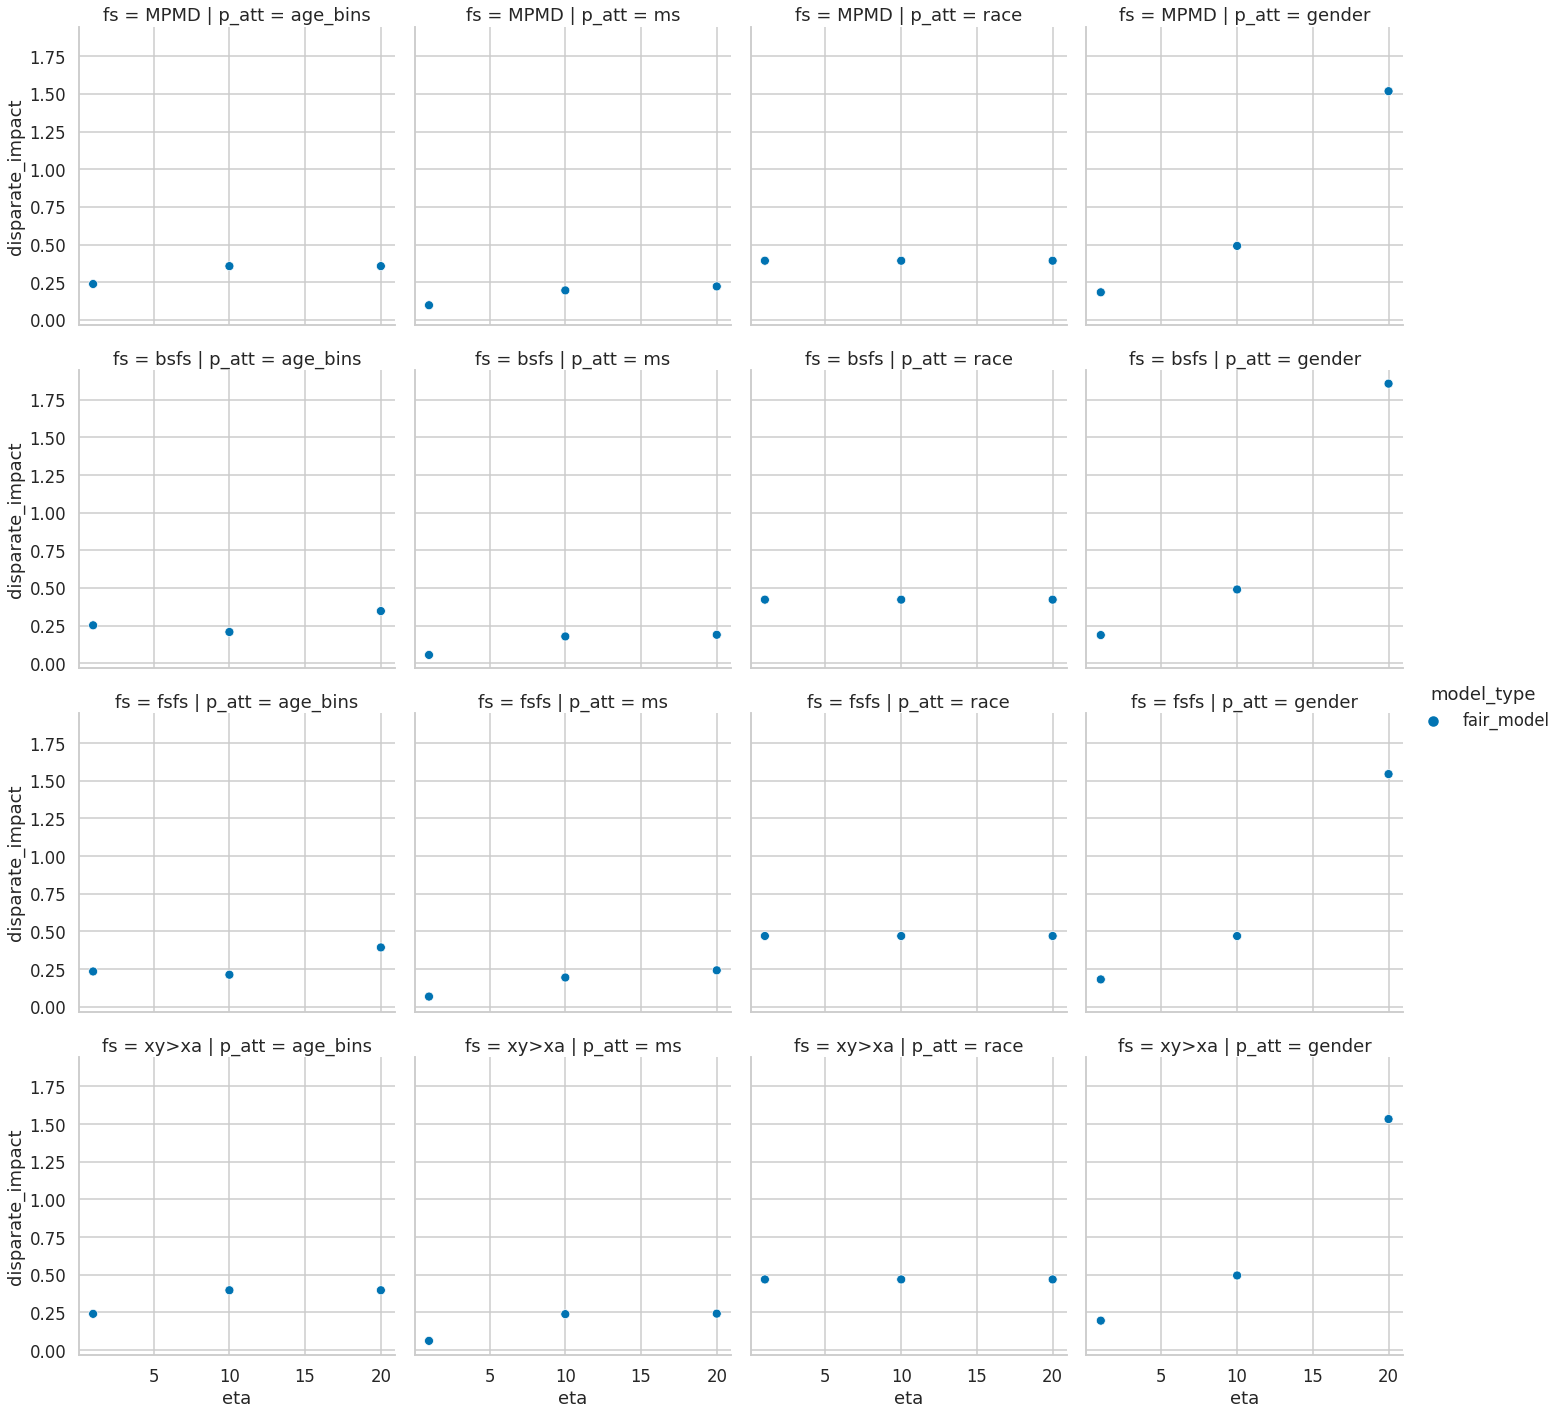

In [15]:

di_eta_adult = sns.relplot(data = data_eta, x = 'eta', y ='disparate_impact', row = 'fs', col = 'p_att', 
                                     hue='model_type')
plt.savefig('di_eta_adult.png')

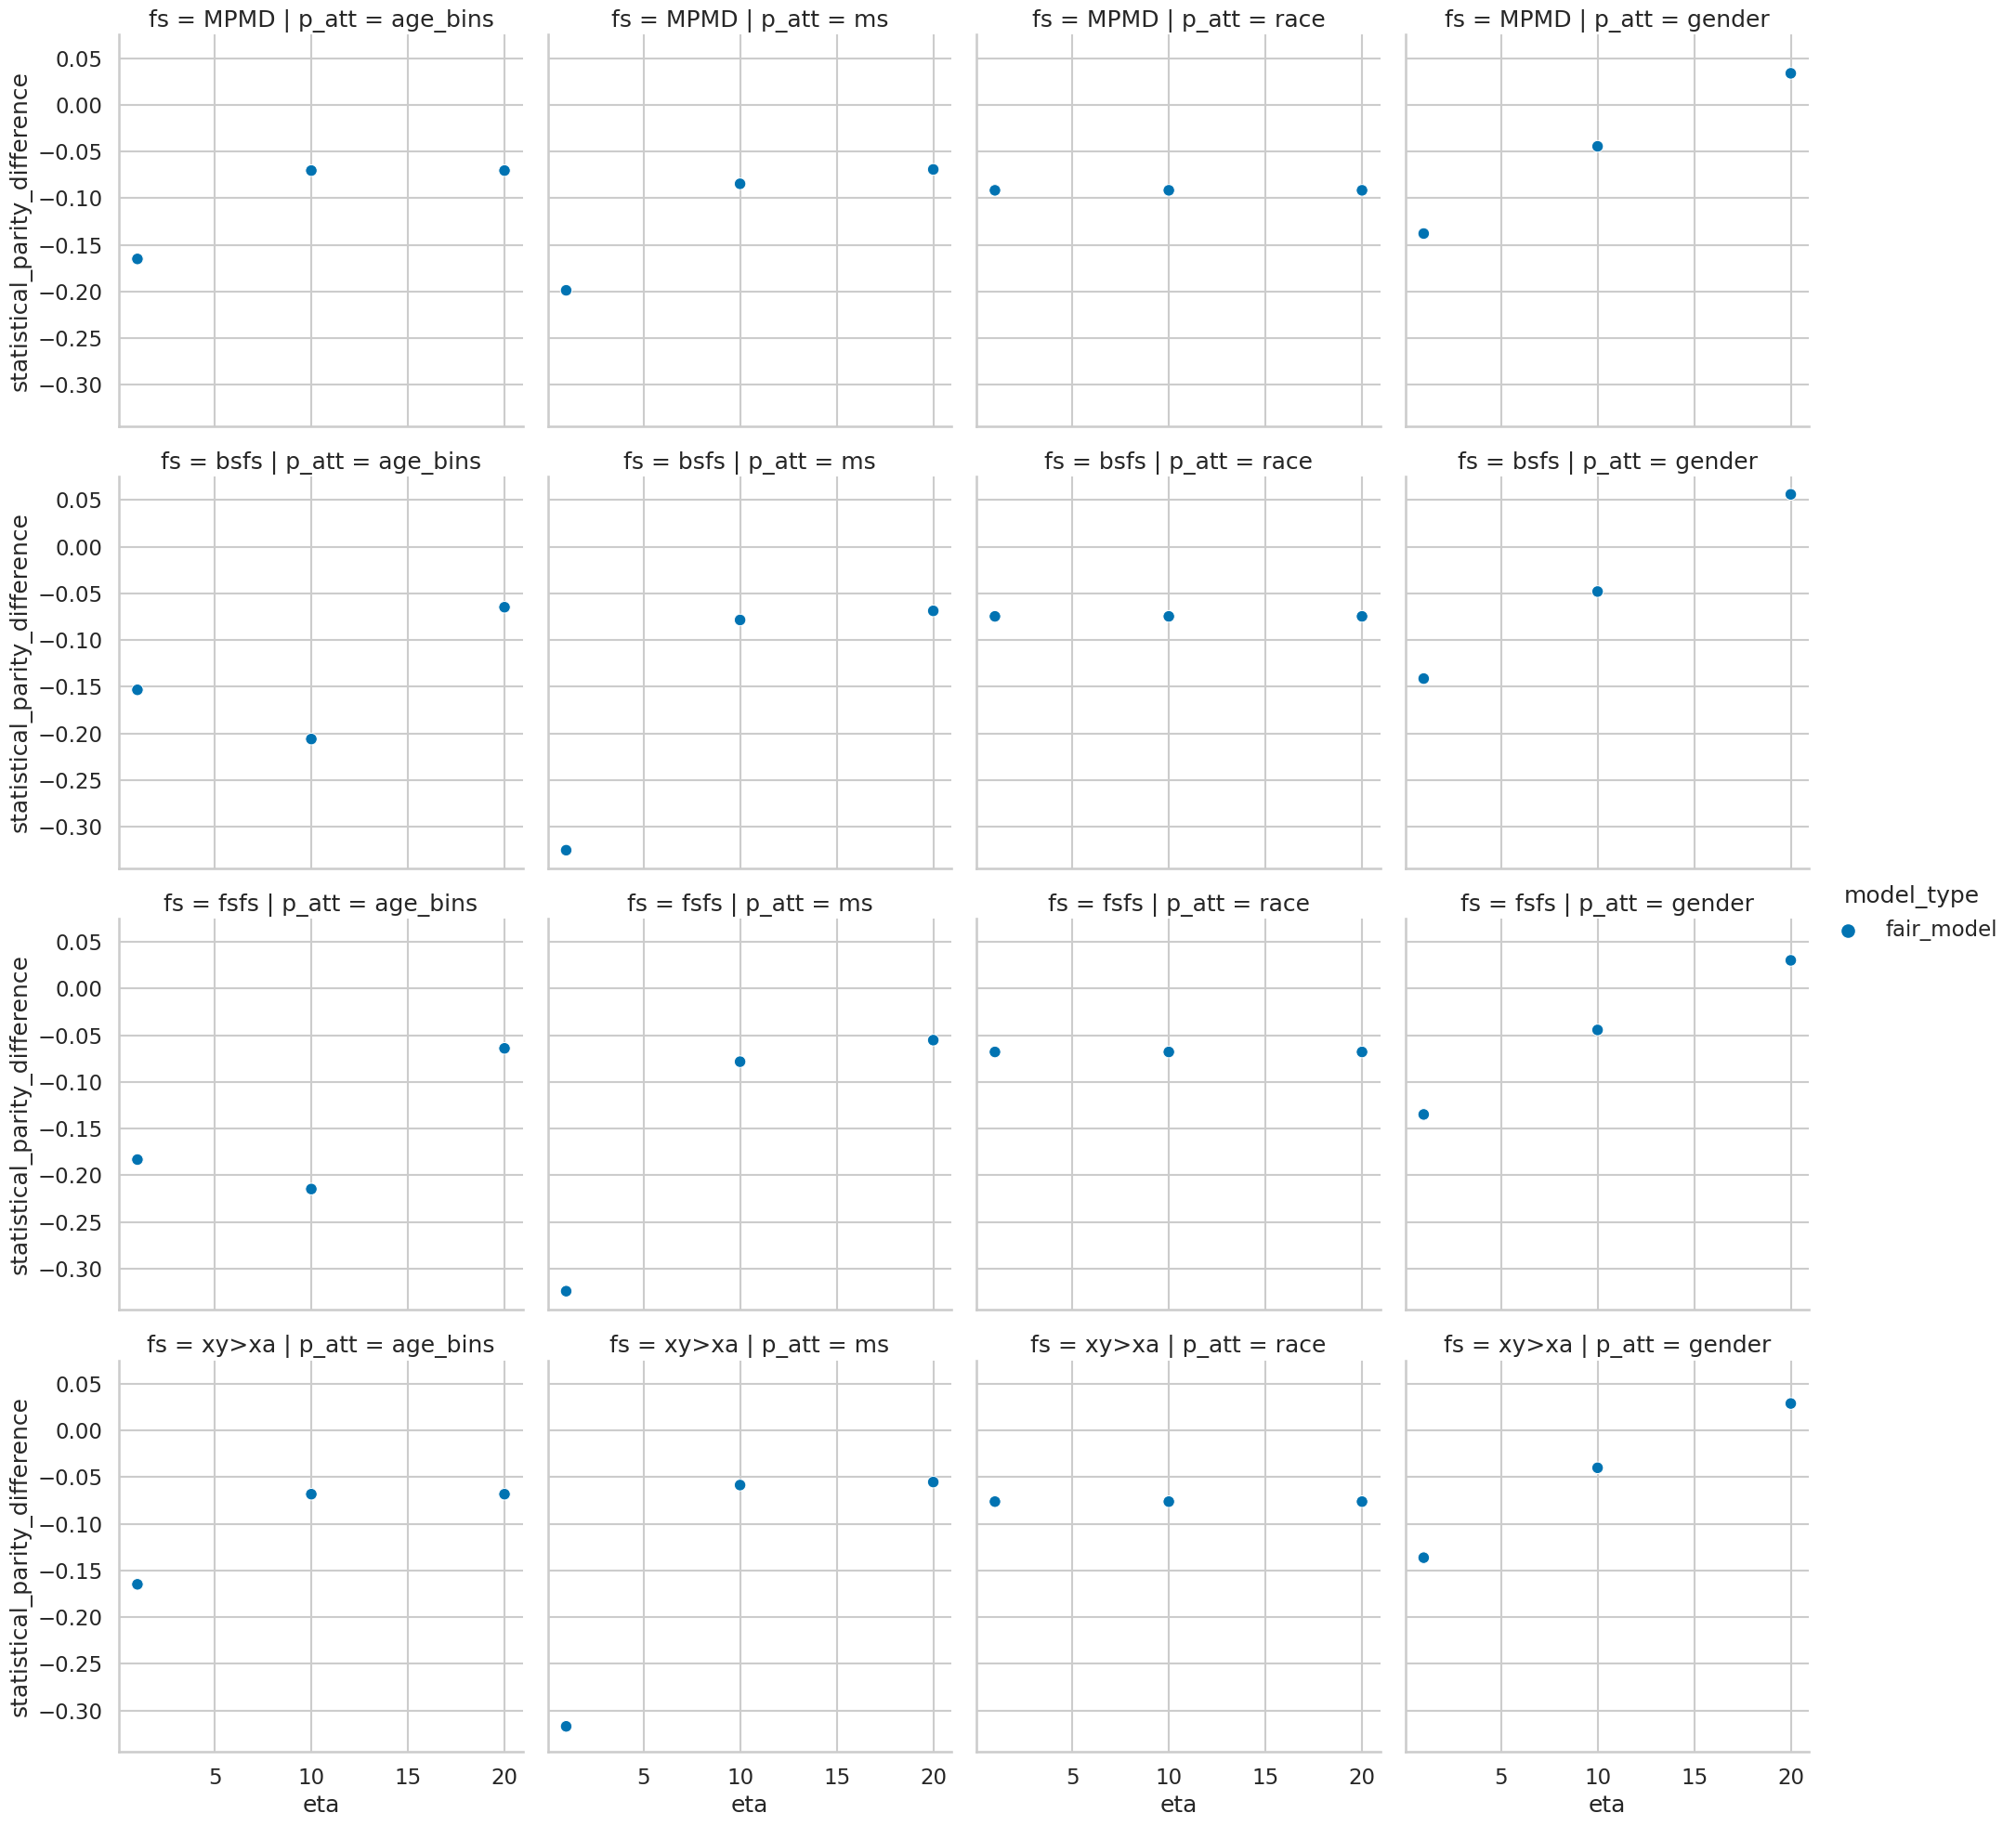

In [16]:

sp_eta_adult = sns.relplot(data = data_eta, x = 'eta', y ='statistical_parity_difference', row = 'fs', col = 'p_att', 
                                     hue='model_type')
plt.savefig('sp_eta_adult.png')


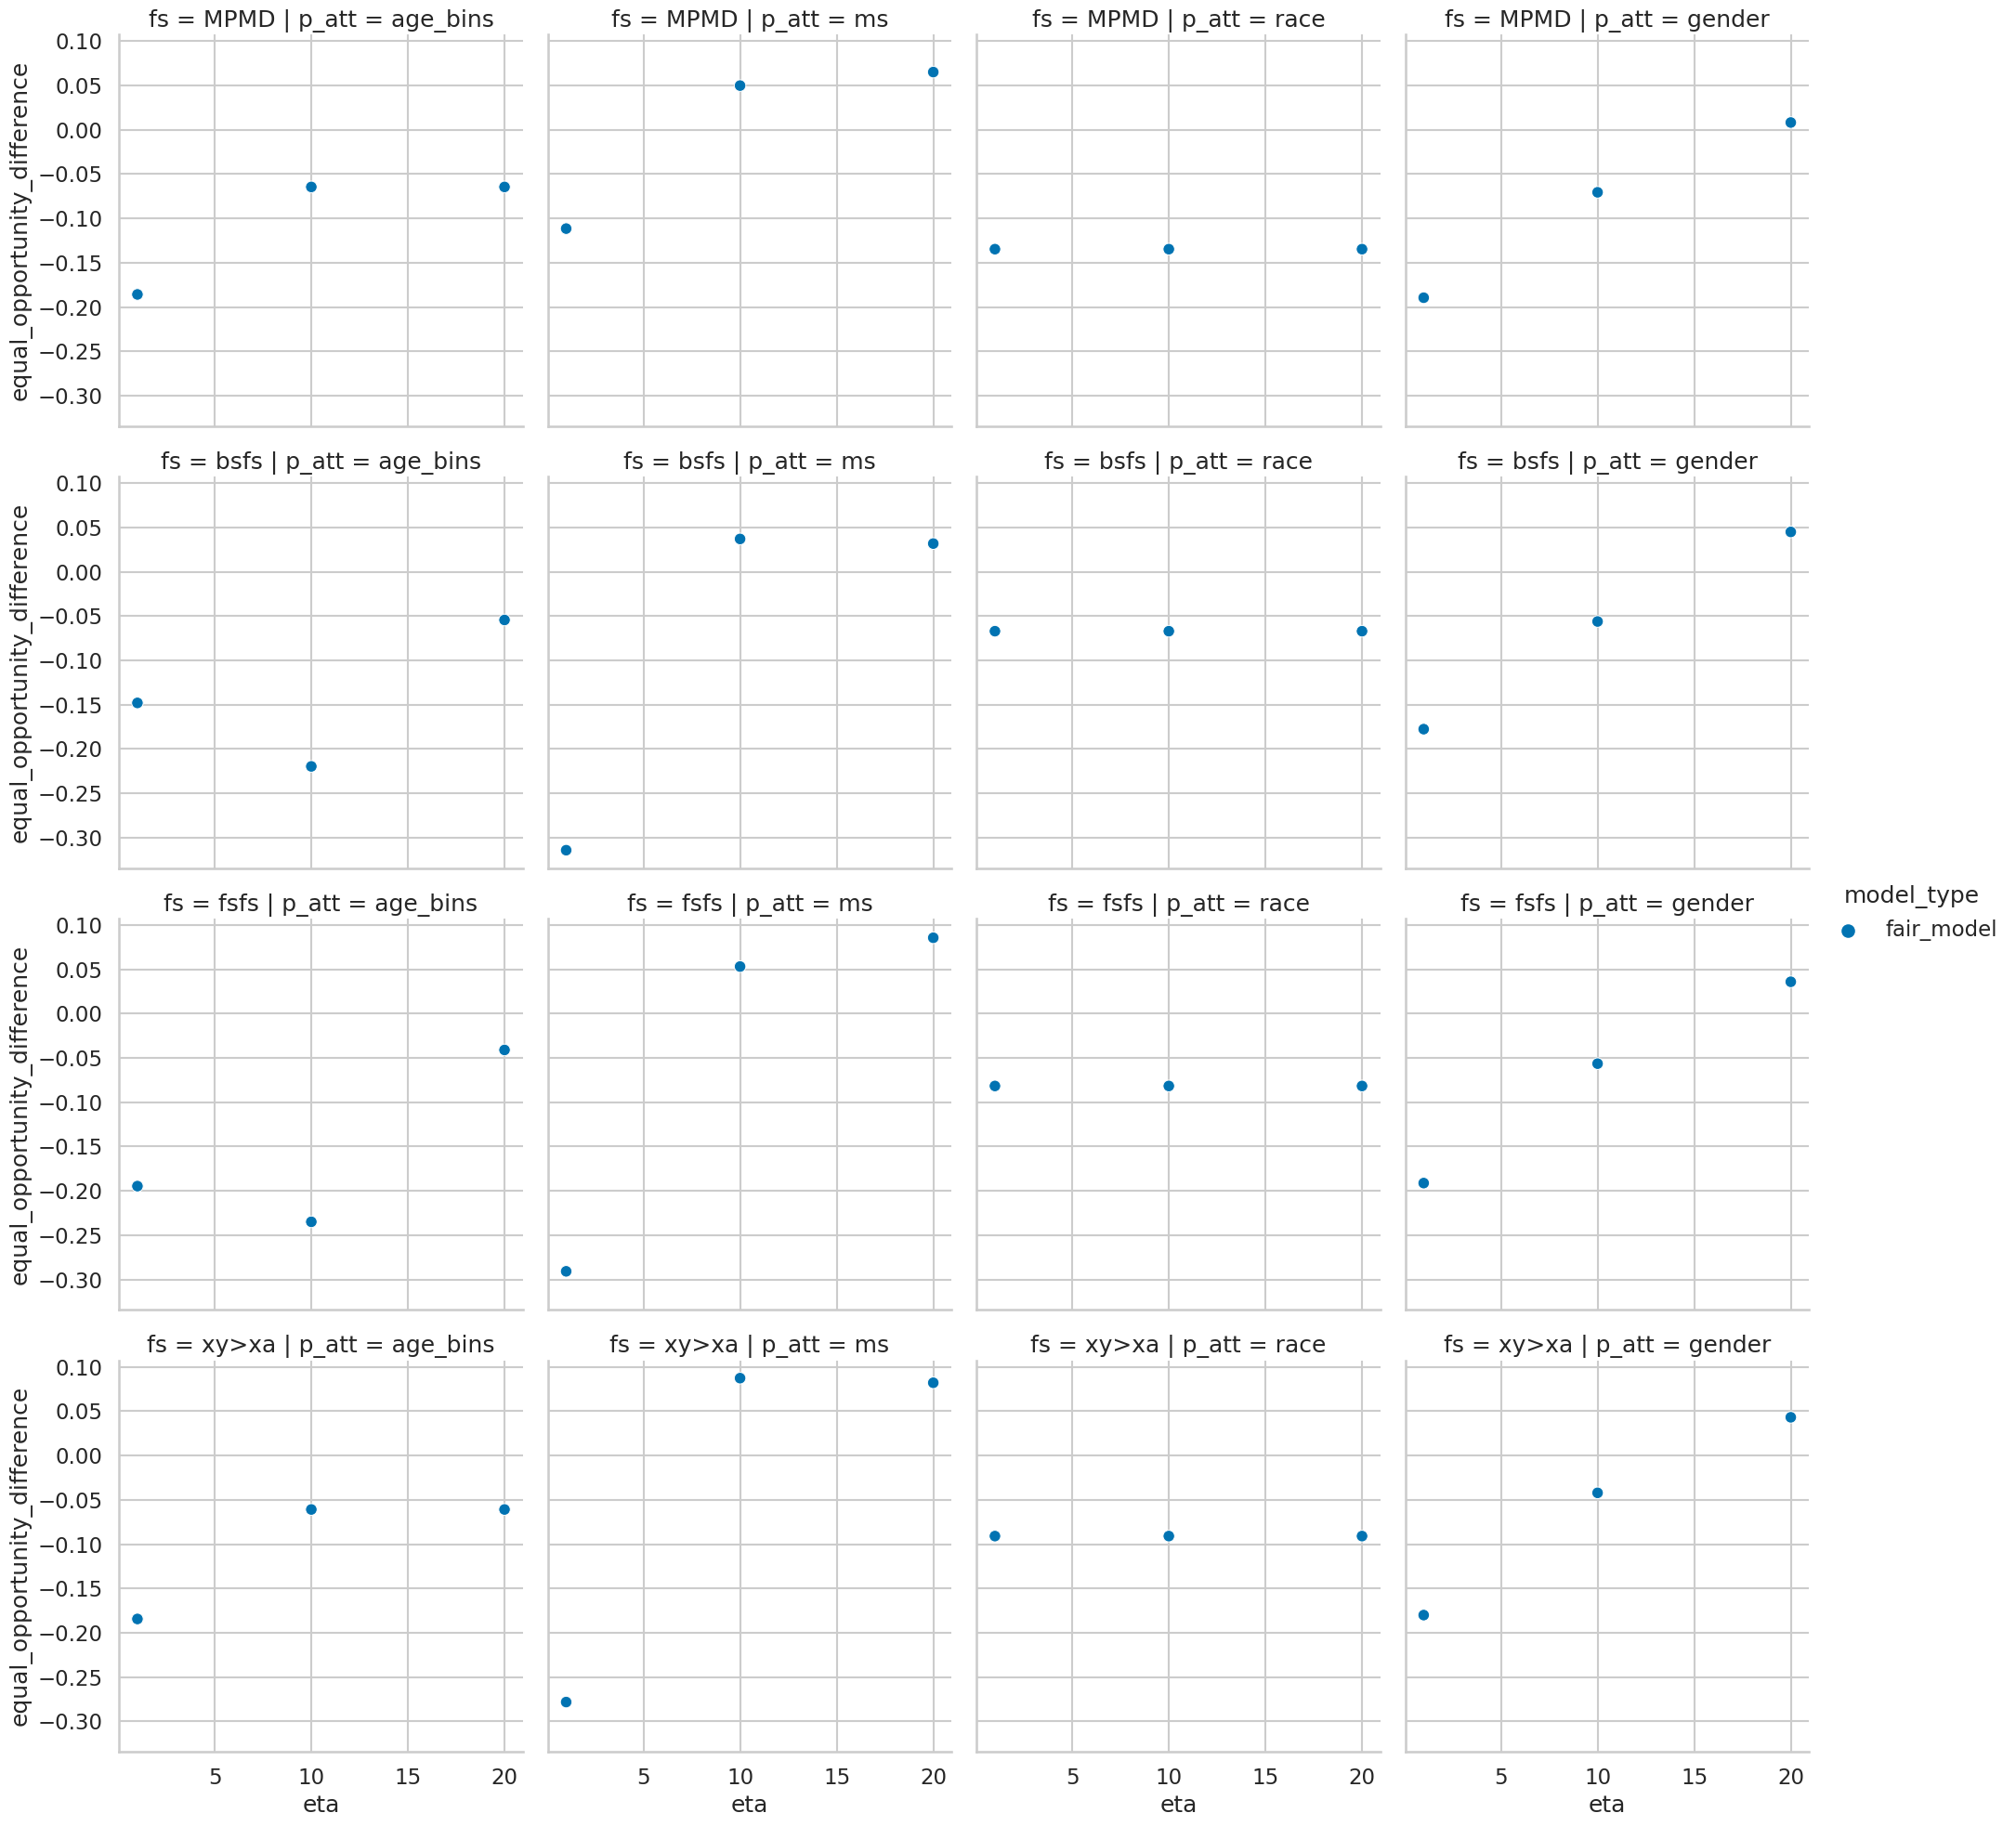

In [17]:


eo_eta_adult = sns.relplot(data = data_eta, x = 'eta', y ='equal_opportunity_difference', row = 'fs', col = 'p_att', 
                                     hue='model_type')
plt.savefig('eo_eta_adult.png')



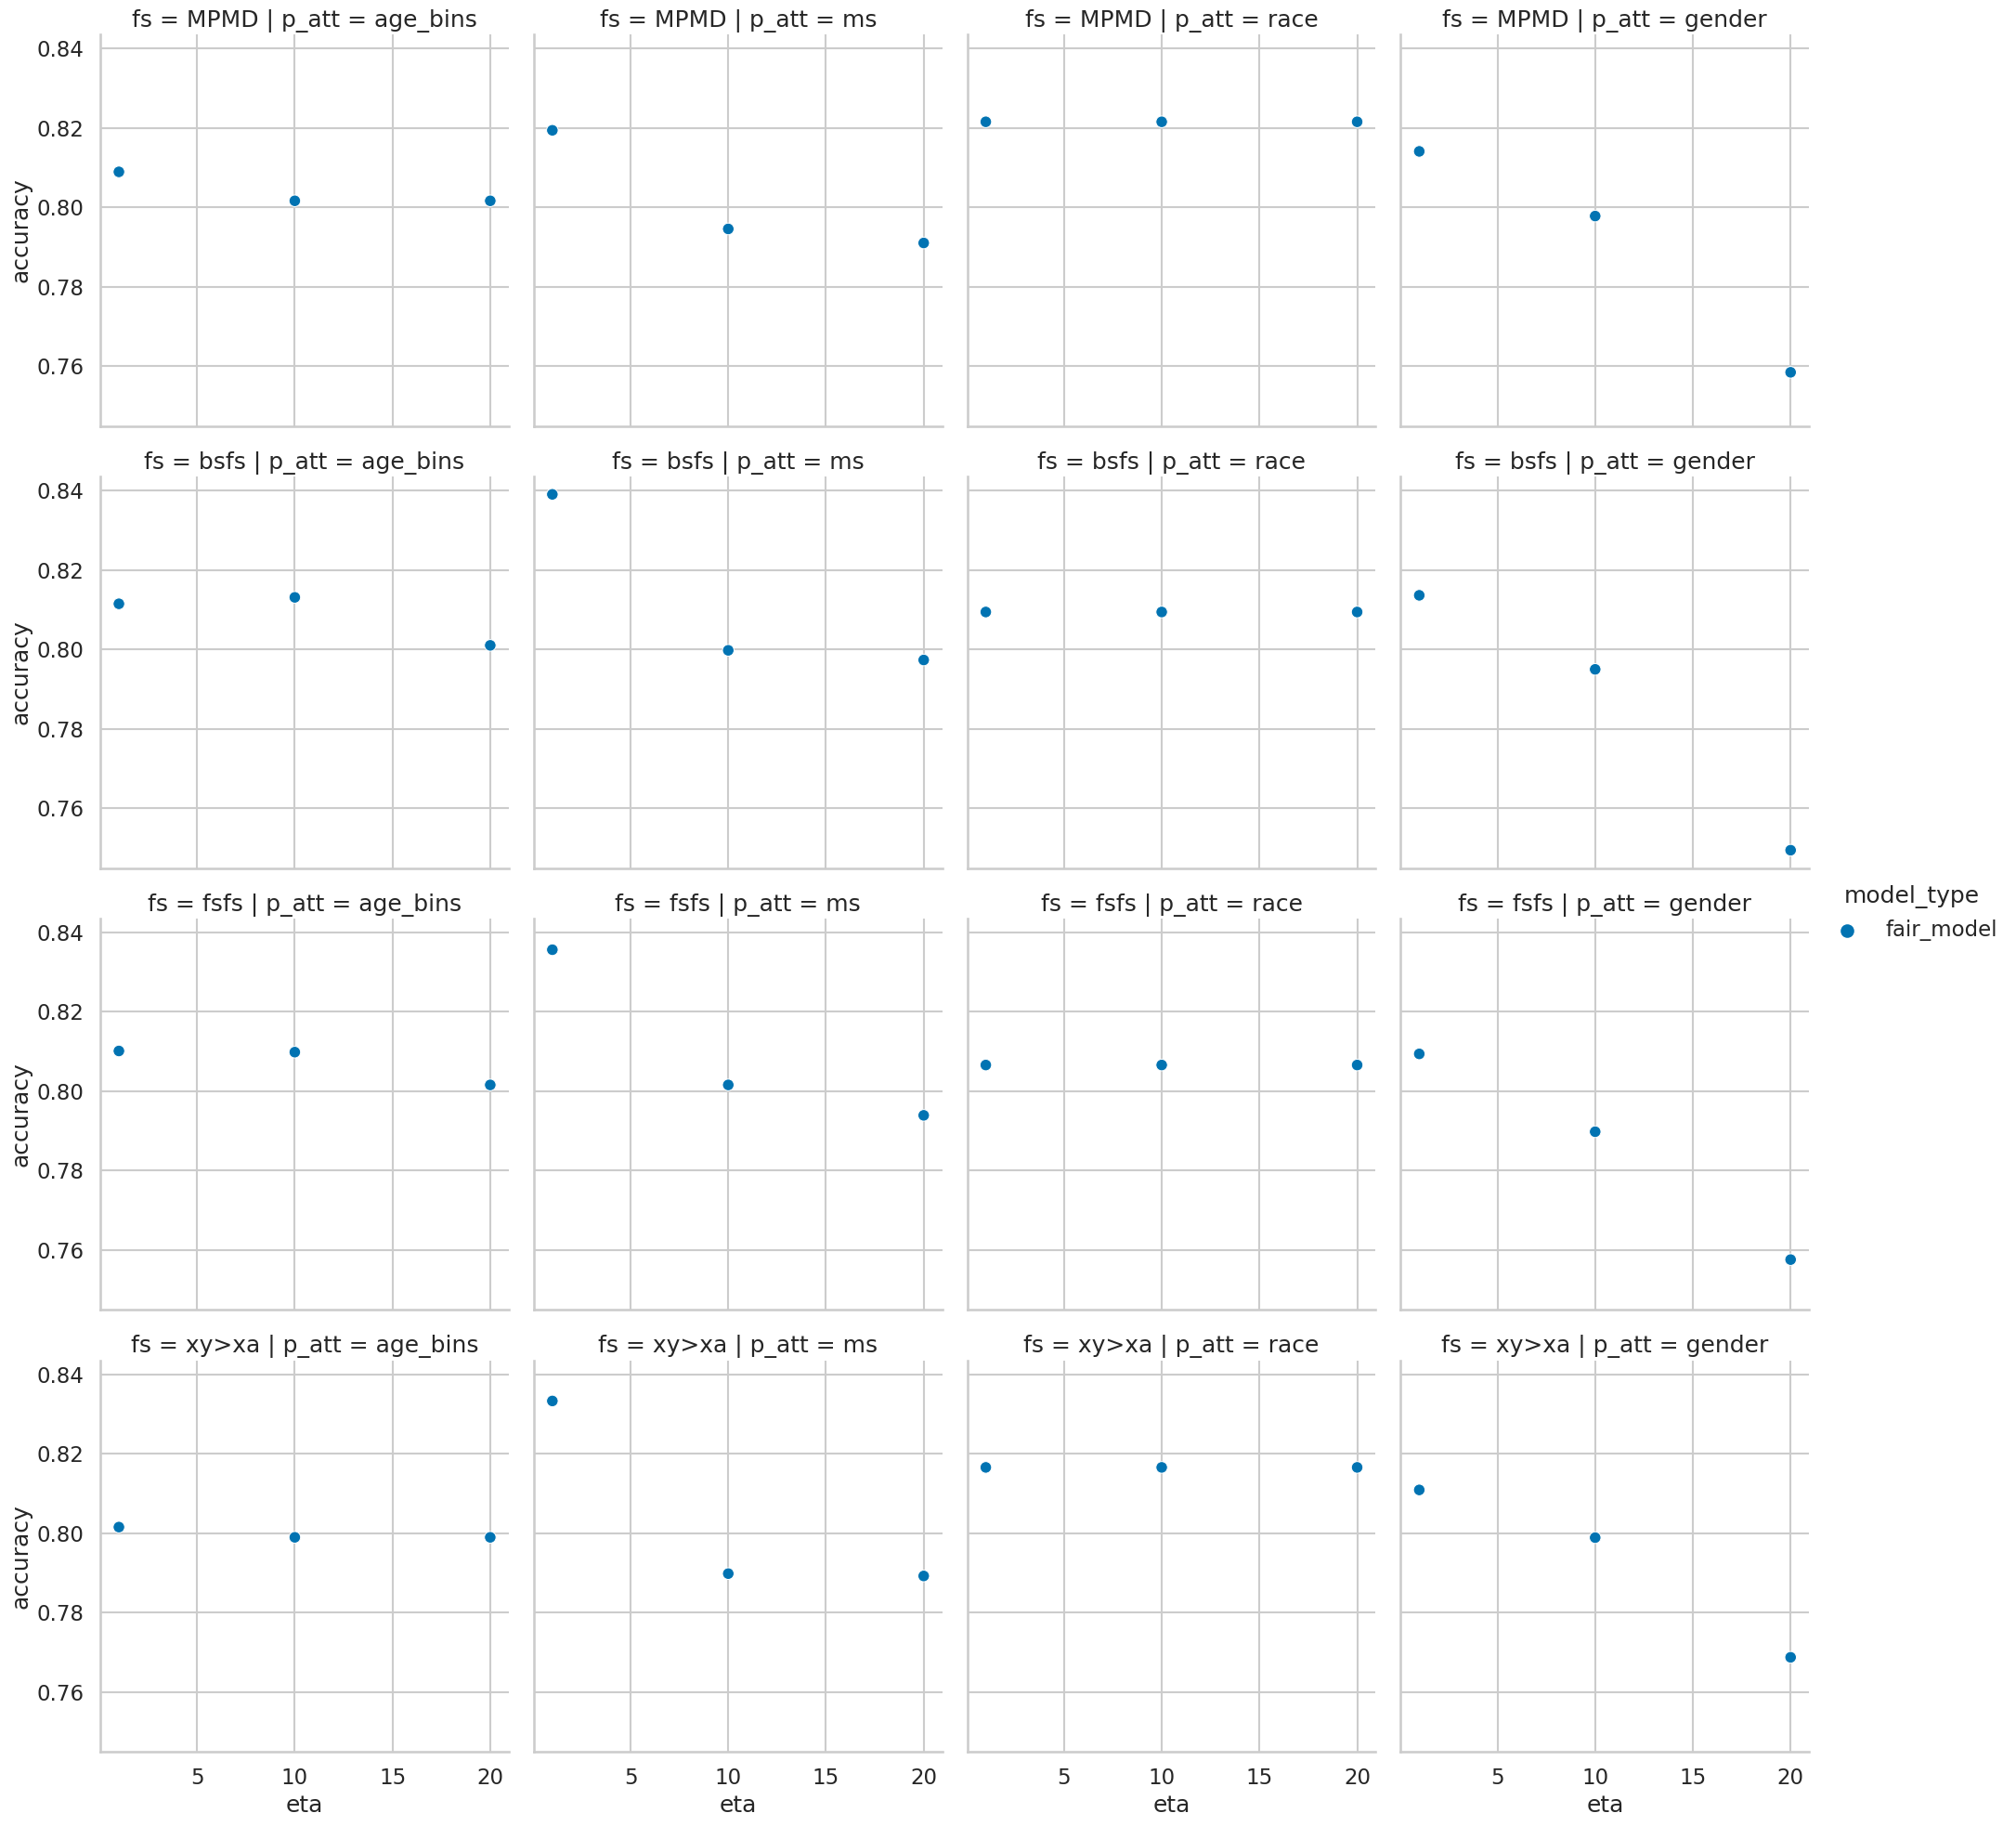

In [18]:


acc_eta_adult = sns.relplot(data = data_eta, x = 'eta', y ='accuracy', row = 'fs', col = 'p_att', 
                                     hue='model_type')
plt.savefig('acc_eta_adult.png')